# Correlaciones: Vehíliculos ligeros en México, 2005-2019

Datos: Registro administrativo de la industria automotriz de vehículos ligeros, INEGI

Frecuencia: Mensual

Periodo: 2005 Enero, 2019 Octubre


Elaboración: Subsecretaría de Industria, Comercio y Competitividad, Secretaría de Economía, con datos del INEGI. 


Pedro José Martínez Alanis

<pedro.martinez@economia.gob.mx>

Actualización: Noviembre 22, 2019

In [1]:
# library 
Packages <- c("tidyverse","lubridate","ggplot2", "dplyr", "seasonal", "ggseas", "ggfortify", "forecast", "mFilter", "plotly", "dynlm", "AER", "MASS", "corrr", "corrplot")
suppressMessages(invisible(lapply(Packages, library, character.only=TRUE)))
#set strings as factors to false 
options(stringsAsFactors=FALSE)
#search()

In [2]:
# raw data 
    rawdata <- read_csv("data/veh_lig.csv", col_types = cols() )
    rawdata <- data.frame(mutate(rawdata, time = make_date(year, mes) ))
# variable selection 
    lmacro <-c("trabajadores" , "masa_salarial" , "ms_wrk" , "tiie" , "tc_fix" , "cetes28" , "inpc" , "pi" , "inpc_auto" , "pi_autos" , "inpc_combusible", "pi_combustible")
    lqv <- c("qv" , "qv_mex" , "qv_imp" , "qv_deu" , "qv_bra" , "qv_can" , "qv_jpn" , "qv_gbr" , "qv_usa" , "qv_ind", "qv_kor" , "qv_tha" , "qv_1" , "qv_2" , "qv_7" )
    lqp <- c("qp" , "qp_1" , "qp_2" , "qp_7")
    lqx <- c("qx" , "qx_deu" , "qx_nafta" , "qx_fca" , "qx_ford" , "qx_gm" , "qx_nsa" , "qx_tyo" , "qx_vw" , "qx_hmc" , "qx_nafta_fca" , "qx_nafta_ford" , "qx_nafta_gm" , "qx_nafta_nsa" , "qx_nafta_tyo" , "qx_nafta_vw" , "qx_nafta_hmc" , "qx_1" , "qx_nafta_1" , "qx_2" , "qx_nafta_2" , "qx_7" , "qx_nafta_7")
# ts data
    wrk <- ts(as_tibble(subset(rawdata, select=c("year", "mes",lmacro,lqv,lqp,lqx))), frequency=12, start=c(2005,1), end=c(2019,10))
    #head(wrk,3)

In [3]:
# lista de variables: seasonal adjustment 
wlist <- lmacro
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lmacro_sa <- wlist

wlist <- lqv
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lqv_sa <- wlist

wlist <- lqp
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lqp_sa <- wlist

wlist <- lqx
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_sa") }
lqx_sa <- wlist
rm(wlist)

# lista de variables: tendencia-ciclo
wlist <- lmacro
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lmacro_tr <- wlist

wlist <- lqv
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lqv_tr <- wlist

wlist <- lqp
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lqp_tr <- wlist

wlist <- lqx
for(i in seq_along(wlist)){ wlist[[i]] <- paste0(wlist[[i]],"_tr") }
lqx_tr <- wlist
rm(wlist)

In [4]:
# for each variable: add to wrk their seasonal adjustment + hp trend
sahp <- function(db, var){
    vsa <- seas(db[,var])
    #vsa$model$arima
    vhp <- hpfilter(vsa$data[,"seasonaladj"])
    vsahp <- ts(subset(mutate(as_tibble(vsa$data), hp=vhp$trend),select=c("seasonaladj","trend", "hp")), frequency=12, start=c(2005,1), end=c(2019,10))
    
    db <- mutate(as_tibble(db), 
            sa = vsahp[,"seasonaladj"], 
            tr= vsahp[,"trend"], 
            hp= vsahp[,"hp"]
                 )
    names(db)[names(db)=="sa"] <- paste0(var,"_sa")
    names(db)[names(db)=="tr"] <- paste0(var,"_tr")
    names(db)[names(db)=="hp"] <- paste0(var,"_hp")
    db <- ts(db, , frequency=12, start=c(2005,1), end=c(2019,10))
    
    rm(vsa, vhp, vsahp)
    return(db)
}




## Base de datos con variables desestacionalizadas, tendencia-ciclo, 

wlist <- c(lmacro, lqv, lqp, lqx)

suppressMessages(

for(i in seq_along(wlist)) {
    #print(wlist[[i]])
    db <- wrk
    var <-wlist[[i]] 
    wrk <- sahp(db,var)
}
)
dim(wrk)

write_csv(as_tibble(wrk), path="output/autos/wrk_macro.csv")

In [5]:
wrk <- ts(as_tibble(read_csv("output/autos/wrk_macro.csv", col_types = cols() )), frequency=12, start=c(2005,1), end=c(2019,10))
#dim(wrk)
wrk_sa <- ts(subset(as_tibble(wrk), select=c(lmacro_sa,lmacro_tr,lqv_sa,lqv_tr, lqp_sa,lqp_tr, lqx_sa, lqx_tr)), frequency=12, start=c(2005,1), end=c(2019,10))
lwrk_sa <- names(as_tibble(wrk_sa))
#head(wrk_sa,3)

### Correlaciones de Variables Macro

,trabajadores,Masa salarial,Tipo de Cambio,Tasa de interés,Inflación (INPC),Inflación Compra Autos,Inflación Combustible Autos
trabajadores,1.00,1.00,0.92,-0.13,0.02,0.38,0.37
Masa salarial,1.00,1.00,0.93,-0.10,0.03,0.41,0.37
Tipo de Cambio,0.92,0.93,1.00,-0.03,0.08,0.55,0.31
Tasa de interés,-0.13,-0.10,-0.03,1.00,0.41,0.02,0.04
Inflación (INPC),0.02,0.03,0.08,0.41,1.00,0.30,0.49
Inflación Compra Autos,0.38,0.41,0.55,0.02,0.30,1.00,0.28
Inflación Combustible Autos,0.37,0.37,0.31,0.04,0.49,0.28,1.00


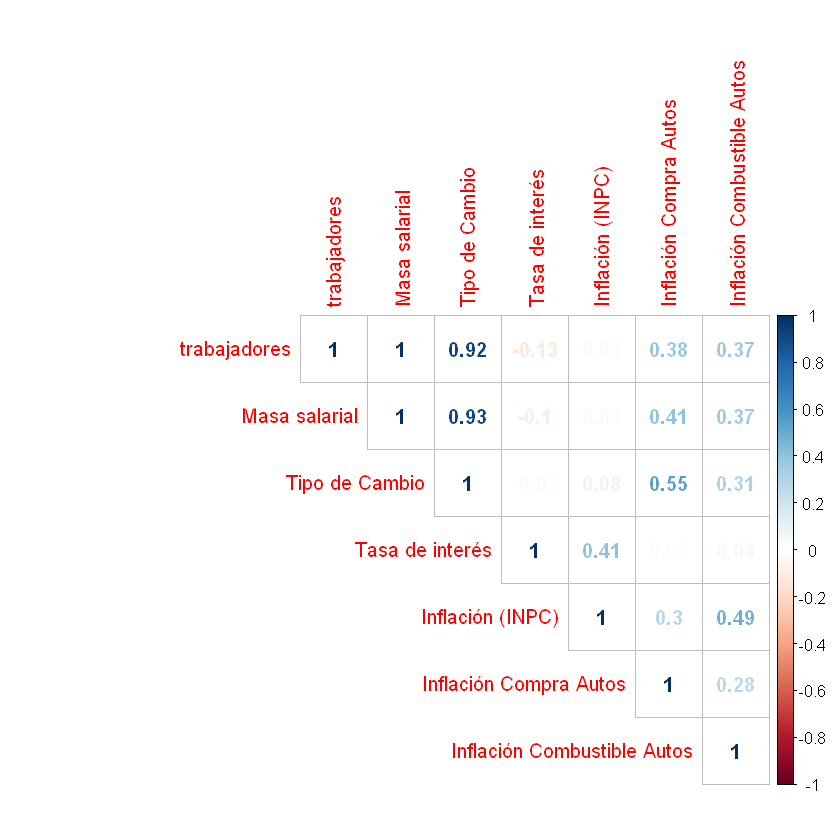

In [6]:
#lmacro_sa
corlist <- lmacro_sa[-c(3,4,7,9,11)]
#corlist
cordata <- subset(as_tibble(wrk_sa), select=corlist)
names(cordata) <- c("trabajadores", "Masa salarial", "Tipo de Cambio", "Tasa de interés", "Inflación (INPC)", "Inflación Compra Autos", "Inflación Combustible Autos")
corrplot(cor(cordata), method="number", type="upper")
round(cor(cordata),2)
rm(cordata)

### Correlaciones de las ventas de Vehículos Ligeros: autos nacionales e importados según país de origen

,Ventas totales,Ventas autos nacional,ventas autos importados,autos de Alemania,autos de Brasil,autos de Canadá,autos de Japón,autos de Reino Unido,autos de EEUU,autos de India,autos de Corea,autos de Tailandia
Ventas totales,1.00,0.83,0.94,0.85,0.22,-0.15,0.83,0.69,0.02,0.87,0.35,0.78
Ventas autos nacional,0.83,1.00,0.58,0.81,-0.15,0.02,0.73,0.64,-0.27,0.79,0.34,0.58
ventas autos importados,0.94,0.58,1.00,0.74,0.42,-0.23,0.75,0.61,0.20,0.78,0.30,0.78
autos de Alemania,0.85,0.81,0.74,1.00,-0.19,-0.36,0.87,0.82,-0.40,0.94,0.26,0.82
autos de Brasil,0.22,-0.15,0.42,-0.19,1.00,0.24,-0.22,-0.20,0.84,-0.17,0.02,-0.11
autos de Canadá,-0.15,0.02,-0.23,-0.36,0.24,1.00,-0.39,-0.40,0.49,-0.44,0.25,-0.53
autos de Japón,0.83,0.73,0.75,0.87,-0.22,-0.39,1.00,0.70,-0.35,0.92,0.22,0.90
autos de Reino Unido,0.69,0.64,0.61,0.82,-0.20,-0.40,0.70,1.00,-0.46,0.82,0.14,0.68
autos de EEUU,0.02,-0.27,0.20,-0.40,0.84,0.49,-0.35,-0.46,1.00,-0.42,0.17,-0.32
autos de India,0.87,0.79,0.78,0.94,-0.17,-0.44,0.92,0.82,-0.42,1.00,0.17,0.88


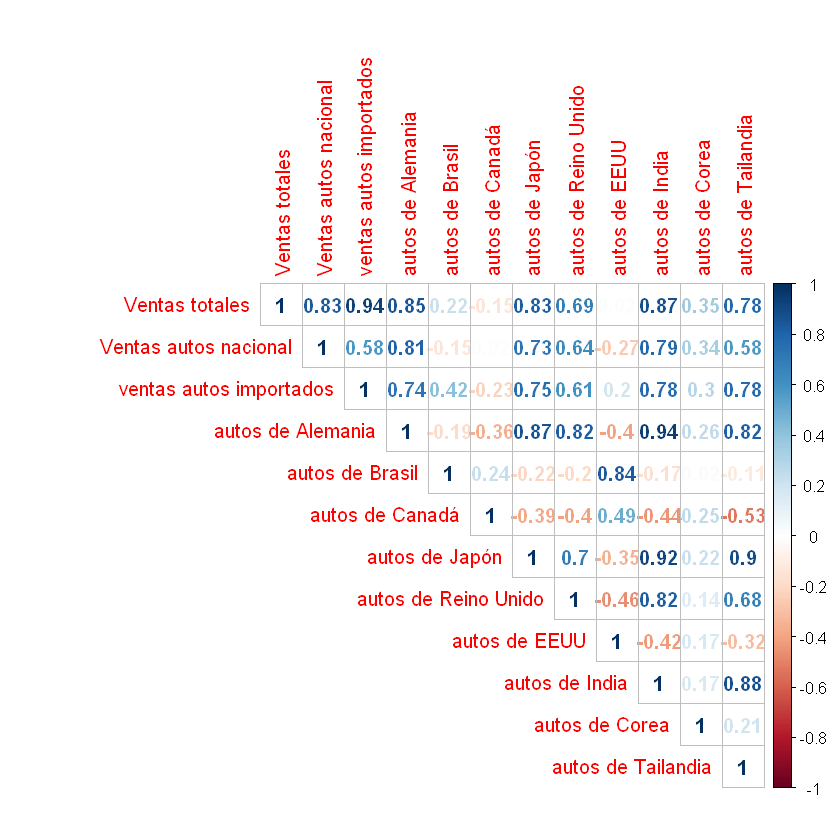

In [7]:
cordata <-subset(as_tibble(wrk_sa), select=c('qv_sa', 'qv_mex_sa', 'qv_imp_sa', "qv_deu_sa" , "qv_bra_sa" , "qv_can_sa" , "qv_jpn_sa" , "qv_gbr_sa" , "qv_usa_sa" , "qv_ind_sa", "qv_kor_sa" , "qv_tha_sa"))
names(cordata) <- c("Ventas totales", "Ventas autos nacional", "ventas autos importados", "autos de Alemania", "autos de Brasil", "autos de Canadá", "autos de Japón", "autos de Reino Unido", "autos de EEUU", "autos de India", "autos de Corea", "autos de Tailandia")
round(cor(cordata),2)
corrplot(cor(cordata), method="number", type="upper")
rm(cordata)

### Correlaciones de las ventas de Vehículos Ligeros: según tipo de auto

,Ventas totales,Ventas autos nacional,ventas autos importados,ventas autos compactos,autos subcompactos,SUVs
Ventas totales,1.00,0.83,0.94,0.84,0.97,0.92
Ventas autos nacional,0.83,1.00,0.58,0.93,0.80,0.74
ventas autos importados,0.94,0.58,1.00,0.64,0.91,0.87
ventas autos compactos,0.84,0.93,0.64,1.00,0.75,0.80
autos subcompactos,0.97,0.80,0.91,0.75,1.00,0.83
SUVs,0.92,0.74,0.87,0.80,0.83,1.00


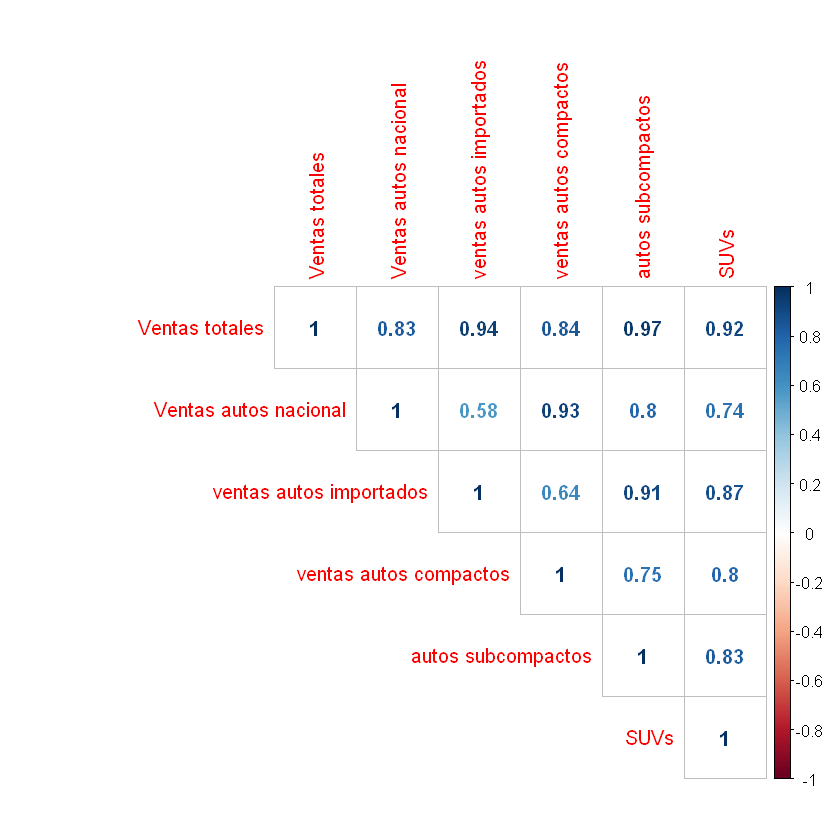

In [8]:
cordata <-subset(as_tibble(wrk_sa), select=c('qv_sa', 'qv_mex_sa', 'qv_imp_sa', "qv_1_sa" , "qv_2_sa" , "qv_7_sa"))
names(cordata) <- c("Ventas totales", "Ventas autos nacional", "ventas autos importados", "ventas autos compactos", "autos subcompactos", "SUVs")
round(cor(cordata),2)
corrplot(cor(cordata), method="number", type="upper")
rm(cordata)

### Correlaciones de la producción de Vehículos Ligeros

,Producción Total,Autos compactos,Autos subcompactos,SUV
Producción Total,1.00,0.59,0.83,0.84
Autos compactos,0.59,1.00,0.65,0.11
Autos subcompactos,0.83,0.65,1.00,0.53
SUV,0.84,0.11,0.53,1.00


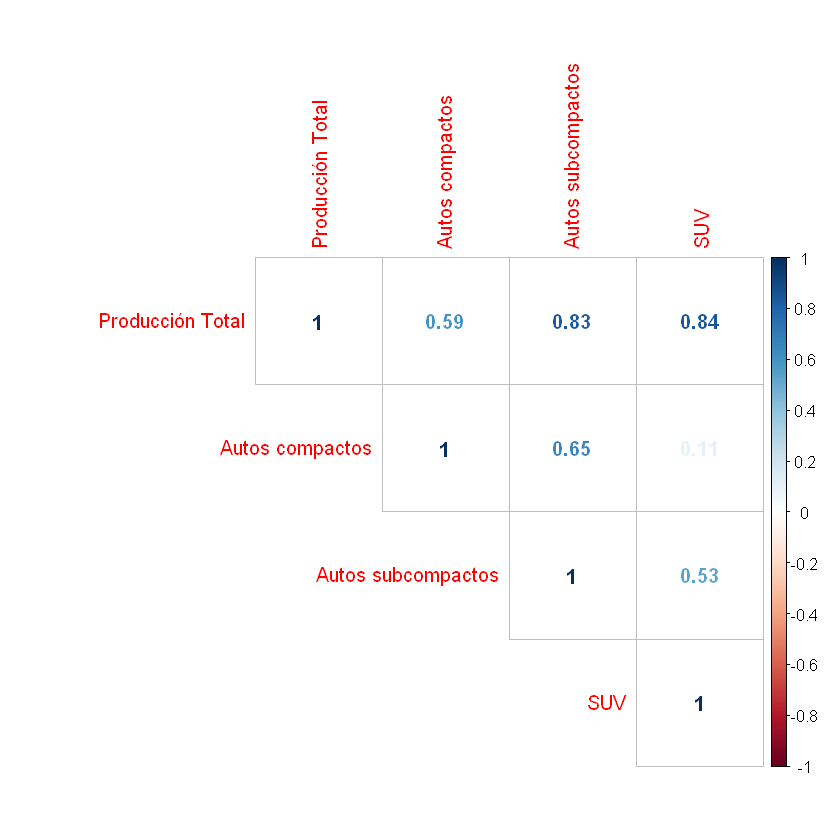

In [9]:
cordata <- subset(as_tibble(wrk_sa), select=lqp_sa)
colnames(cordata) <- c("Producción Total", "Autos compactos", "Autos subcompactos", "SUV")
round(cor(cordata),2)
corrplot(cor(cordata), method="number", type="upper")
rm(cordata)

### Correlaciones de las exportaciones de Vehículos Ligeros

,Exportación Total de Autos,Exportación región NAFTA/T-MEC,Exportación autos compactos,Exportación autos subcompactos,Exportación SUVs
Exportación Total de Autos,1.00,0.98,0.48,0.82,0.86
Exportación región NAFTA/T-MEC,0.98,1.00,0.42,0.75,0.87
Exportación autos compactos,0.48,0.42,1.00,0.43,0.03
Exportación autos subcompactos,0.82,0.75,0.43,1.00,0.62
Exportación SUVs,0.86,0.87,0.03,0.62,1.00


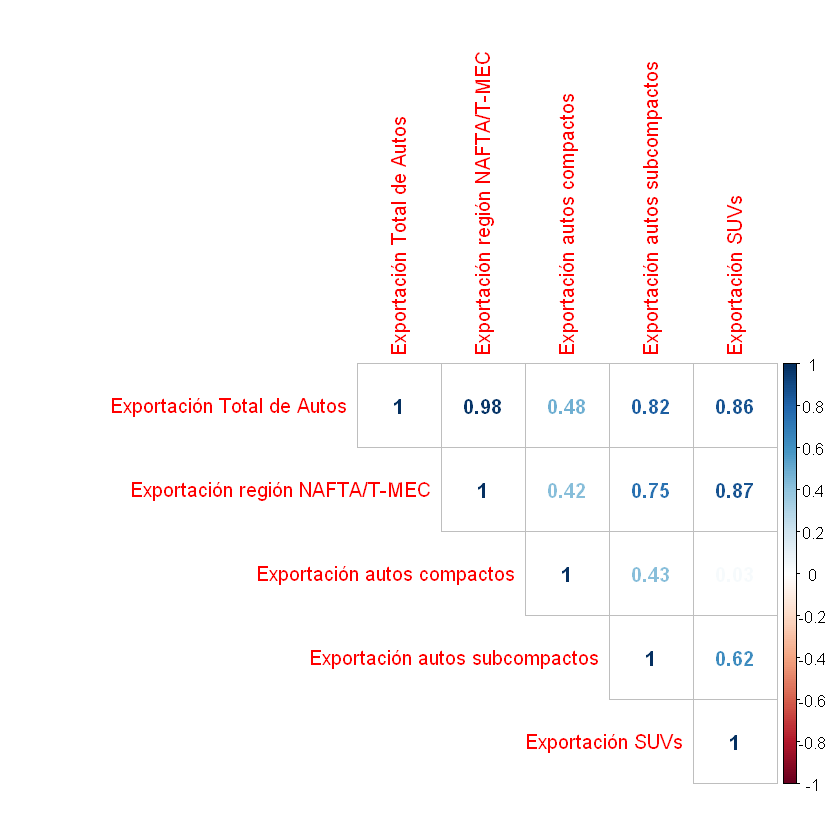

In [10]:
cordata <- subset(as_tibble(wrk_sa), select=c('qx_sa', 'qx_nafta_sa', 'qx_1_sa', 'qx_2_sa', 'qx_7_sa'))
colnames(cordata) <- c("Exportación Total de Autos", "Exportación región NAFTA/T-MEC", "Exportación autos compactos", "Exportación autos subcompactos",  "Exportación SUVs")
round(cor(cordata),2)
corrplot(cor(cordata), method="number", type="upper")
rm(cordata)